<div class="usecase-title">Air Quality Prediction</div>

<div class="usecase-authors"><b>Authored by: </b> Tharusha Cao</div>

<div class="usecase-duration"><b>Duration:</b> 270 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Machine Learning , Deep Learning ( Tensorflow ) </div>
</div>

<div class="usecase-section-header">Scenario</div>

Air pollution is one of the hot issues that attracted widespread attention from urban and society management. Air quality prediction is to issue an alarm when severe pollution occurs, or pollution concentration exceeds a specific limit, contributing to the measure-taking of relevant departments this is also may be due to development activity, guiding urban socio-economic activities to promote sustainable urban development.

### User Story

As a policy maker, I want to predict air quality levels based on environmental data and development activity, so that I can make informed decisions to manage city air pollution by managing current and future development.

As a civilian, I want to be in a healthy environment especially in a park without air pollution causing respiratory issues. 

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- python
- Machine Learning
- Deep Learning
- Data Analysis and visualization skills

<div class="usecase-section-header">Predict Air Quality in Argyle Square and how its effected by activity development </div>



Exploring the relationship between active development and the air quality in Argyle Square by using an air quality dataset with over 140000 data points and an active development dataset. I will firstly find the trend of the air quality mainly focusing on carbon monoxide and seeing how it will or will not rise in the future and then I will compare the air quality with the development which has been made around Argyle Square (1km Radius). This is to study how our air quality is affected with the development around us helping us better understand how we can reduce carbon monoxide which is a leading threat to not only Argyle Square but in fact can be used for Melbourne as a whole and even the world


## References
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical data handling.
- **Scikit-learn**: For modeling and predictions.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Folium**: For creating interactive maps.
- **Requests**: For making HTTP requests to download data.
- **TensorFlow**: An end-to-end open-source platform for machine learning.
- **Geopy**: For geocoding and handling location data.
- **Haversine**: Used to calculate the distance between two points on the Earth.
- **Tkinter**: Standard GUI toolkit 
in Python.

# Code

Note the "Discussion" sections are displayed under relevant code outputs.

### Fetching Data ###

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install folium
!pip install matplotlib
!pip install requests
!pip install tensorflow
!pip install geopy
!pip install scikit-learn
!pip install haversine
!pip install tk

In [81]:
###################################################################
# Libraries used:
###################################################################
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import requests
import math
import tensorflow as tf
from io import StringIO
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from haversine import haversine
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import tkinter as tk
from tkinter import messagebox

In [3]:
#Convert to Function 

def API_Unlimited(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))


"""
Get unlimited data from the API Function 

Parameters:
datasetname (string): dataset name as from city of melbourn 
apikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)

f = open("API.txt","r")
api_key = f.read()

Returns:
Csv : Returns the csv dataset of the dataset name 
"""


'\nGet unlimited data from the API Function \n\nParameters:\ndatasetname (string): dataset name as from city of melbourn \napikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)\n\nf = open("API.txt","r")\napi_key = f.read()\n\nReturns:\nCsv : Returns the csv dataset of the dataset name \n'

In [4]:
dataset_id_1 = 'argyle-square-air-quality'
dataset_id_2 = 'development-activity-monitor'
AirQuality_df = API_Unlimited(dataset_id_1)
ActivityMonitor_df = API_Unlimited(dataset_id_2)


                             time    dev_id           sensor_name  \
44069   2020-10-28T16:37:09+00:00  ems-ec8a  Air Quality Sensor 2   
83467   2022-06-03T12:05:33+00:00  ems-ec8a  Air Quality Sensor 2   
77670   2021-07-17T06:26:53+00:00  ems-ce10  Air Quality Sensor 1   
133810  2023-04-18T05:05:16+00:00  ems-ec8a  Air Quality Sensor 2   
129086  2023-01-29T11:13:55+00:00  ems-ec8a  Air Quality Sensor 2   
122437  2022-12-03T09:06:41+00:00  ems-ec8a  Air Quality Sensor 2   
23137   2021-05-04T08:21:14+00:00  ems-ec8a  Air Quality Sensor 2   
9895    2020-09-24T02:42:52+00:00  ems-ec8a  Air Quality Sensor 2   
37038   2021-12-25T14:35:21+00:00  ems-ec8a  Air Quality Sensor 2   
137960  2024-03-28T11:45:32+00:00  ems-ec8a  Air Quality Sensor 2   

                       lat_long  averagespl  carbonmonoxide  humidity  ibatt  \
44069   -37.802772, 144.9655513        54.0         -6167.0      80.0  137.0   
83467   -37.802772, 144.9655513        58.0         -7571.0      73.0  102.0   


In [5]:
num_records = len(AirQuality_df)
print(f'The dataset 1  contains {num_records} records.')
num_records2 = len(ActivityMonitor_df)
print(f'The dataset 2 contains {num_records2} records.')

The dataset 1  contains 141607 records.
The dataset 2 contains 1433 records.


In [6]:
pd.set_option('display.max_columns', None)
AirQuality_df.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
1,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33
2,2021-05-15T06:10:49+00:00,ems-ce10,Air Quality Sensor 1,"-37.802772, 144.9655513",70.0,-2887.0,61.0,132.0,123.0,-13.0,0.0,151.0,87.0,0.0,0.0,0.0,13.2,3.90,16.03
3,2021-05-15T07:49:32+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6822.0,59.0,98.0,306.0,147.0,0.0,151.0,60.0,0.0,1.0,1.0,12.7,3.95,0.00
4,2021-05-15T09:19:32+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",57.0,-6822.0,63.0,109.0,306.0,142.0,0.0,151.0,65.0,2.0,5.0,3.0,12.1,3.93,0.00


### Pre-Proccessing Data ###
##### This section will consist of pre-processing the data sets such as removing unnecessary columns, Filling missing values , Normalization, Encoding and more to help make the data usefull for machine learning and deep learning 

In [7]:
# Removing Uneccerrary columns which wont be any use for data analysis
#From the Air Quality we will be using carbonMonoxide as the Target Feature 
Droping_Features_AirQuality = ['vpanel','vbatt','pm25','pm10','pm1','peakspl','ibatt','averagespl','sensor_name','dev_id']
AirQuality_df = AirQuality_df.drop(columns=Droping_Features_AirQuality)

In [8]:
AirQuality_df.head()

,time,lat_long,carbonmonoxide,humidity,nitrogendioxide,ozone,particulateserr,particulatesvsn,temperature
0,2022-05-03T21:46:34+00:00,"-37.802772, 144.9655513",-6261.0,77.0,268.0,137.0,0.0,151.0,15.1
1,2021-05-15T06:04:33+00:00,"-37.802772, 144.9655513",-6261.0,51.0,258.0,119.0,0.0,151.0,14.9
2,2021-05-15T06:10:49+00:00,"-37.802772, 144.9655513",-2887.0,61.0,123.0,-13.0,0.0,151.0,13.2
3,2021-05-15T07:49:32+00:00,"-37.802772, 144.9655513",-6822.0,59.0,306.0,147.0,0.0,151.0,12.7
4,2021-05-15T09:19:32+00:00,"-37.802772, 144.9655513",-6822.0,63.0,306.0,142.0,0.0,151.0,12.1


#### In this first part we will be trying to predict future AirQuality in Argyle Square, The features used :


##### 1. date_measure - Important component as we need to recognize the change in the pattern
##### 2. Lat Long - Currently only needed for part 2
##### 3. carbonMonoxide - This is the Target for this part, we need to find the carbonMonoxide value for future Dates
##### 4. humidity - Training with corelation
##### 5. nitrogenDioxide - Training with corelation
##### 6. ozone - Training with corelation
##### 7. temperature - Training with corelation
##### 8. particulatesErr - Will be used in Part 2
##### 9. particulatesVsn - Will be used in Part 2

In [9]:
#Checking for empty data 
missing_values = AirQuality_df.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)


#Lets see propotion
missing_proportion = (missing_values / len(AirQuality_df))*100
print("--------------------------Current Missing Values Propotion --------------------------")
print(missing_proportion)

#Function to call 
def FindMissingVal(df):
  #now lets have a array to store the feature with number of NAN values
  MissingFeaturenValues = []
  #now we check each column
  for column in df.columns:
    missingVals = np.sum(df[column].isnull()) # sum the number of NAN values into variable
    MissingFeaturenValues.append({'Feature':column ,'Number of Missing Values':missingVals}) #the array consist of dictionary with feature and its missing values
  return MissingFeaturenValues


--------------------------Current Missing Values --------------------------
time                  0
lat_long              0
carbonmonoxide     9826
humidity           9826
nitrogendioxide    9826
ozone              9826
particulateserr    9826
particulatesvsn    9826
temperature        9826
dtype: int64
--------------------------Current Missing Values Propotion --------------------------
time               0.000000
lat_long           0.000000
carbonmonoxide     6.938923
humidity           6.938923
nitrogendioxide    6.938923
ozone              6.938923
particulateserr    6.938923
particulatesvsn    6.938923
temperature        6.938923
dtype: float64


##### We can see that there are around 9765 missing values for the Above and We can see that the proportion is 6.993583% of 139629 data points in Aquality Data set 
##### I will be filling the missing values with the mean 

In [10]:
AirQuality_df_copy = AirQuality_df.copy()
for item in FindMissingVal(AirQuality_df):
    if item['Number of Missing Values'] != 0 : # get the number of missing values > 0 we will use mean
        name = item['Feature'] # each column
        print(name + " : Has been replaced with its mean")
        AirQuality_df_copy.fillna(value=AirQuality_df[name].mean(), inplace=True) 

carbonmonoxide : Has been replaced with its mean
humidity : Has been replaced with its mean
nitrogendioxide : Has been replaced with its mean
ozone : Has been replaced with its mean
particulateserr : Has been replaced with its mean
particulatesvsn : Has been replaced with its mean
temperature : Has been replaced with its mean


In [11]:
AirQuality_df_copy.isnull().sum()

time               0
lat_long           0
carbonmonoxide     0
humidity           0
nitrogendioxide    0
ozone              0
particulateserr    0
particulatesvsn    0
temperature        0
dtype: int64

#### Date Time column needs to be standardized and Lat / Long also needs to be split (Not sure i need right now , i probably will.


In [12]:
# Convert 'date_measure' to datetime remove any incontencies 
AirQuality_df_copy['time'] = pd.to_datetime(AirQuality_df_copy['time'], utc=True)


# Split 'Lat/Long' into two separate columns and convert to float
AirQuality_df_copy[['latitude_air', 'longitude_air']] = AirQuality_df_copy['lat_long'].str.split(', ', expand=True).astype(float)
# Drop the original 'Lat Long' column
AirQuality_df_copy = AirQuality_df_copy.drop(columns=['lat_long'])

AirQuality_df_copy.head()

,time,carbonmonoxide,humidity,nitrogendioxide,ozone,particulateserr,particulatesvsn,temperature,latitude_air,longitude_air
0,2022-05-03 21:46:34+00:00,-6261.0,77.0,268.0,137.0,0.0,151.0,15.1,-37.802772,144.965551
1,2021-05-15 06:04:33+00:00,-6261.0,51.0,258.0,119.0,0.0,151.0,14.9,-37.802772,144.965551
2,2021-05-15 06:10:49+00:00,-2887.0,61.0,123.0,-13.0,0.0,151.0,13.2,-37.802772,144.965551
3,2021-05-15 07:49:32+00:00,-6822.0,59.0,306.0,147.0,0.0,151.0,12.7,-37.802772,144.965551
4,2021-05-15 09:19:32+00:00,-6822.0,63.0,306.0,142.0,0.0,151.0,12.1,-37.802772,144.965551


In [13]:
# Lets add normalization - Since the data has a large gap for each feature normalization would help
#Using Standard Scaling 
#We dont need norms for date_measure,latitude,longitude
AirQuality_df_copy_Normalized = AirQuality_df_copy.copy()
data_float_columns =['humidity','nitrogendioxide','ozone','particulateserr','particulatesvsn','temperature']
data_target = ['carbonmonoxide']

scaler = StandardScaler()
AirQuality_df_copy_Normalized[data_float_columns] = scaler.fit_transform(AirQuality_df_copy[data_float_columns])
target_scaler = StandardScaler()
AirQuality_df_copy_Normalized[data_target] = target_scaler.fit_transform(AirQuality_df_copy[data_target])
AirQuality_df_copy_Normalized.head(), AirQuality_df_copy.info()

AirQuality_df_copy_Normalized.head(), AirQuality_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141607 entries, 0 to 141606
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   time             141607 non-null  datetime64[ns, UTC]
 1   carbonmonoxide   141607 non-null  float64            
 2   humidity         141607 non-null  float64            
 3   nitrogendioxide  141607 non-null  float64            
 4   ozone            141607 non-null  float64            
 5   particulateserr  141607 non-null  float64            
 6   particulatesvsn  141607 non-null  float64            
 7   temperature      141607 non-null  float64            
 8   latitude_air     141607 non-null  float64            
 9   longitude_air    141607 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(9)
memory usage: 10.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141607 entries, 0 to 141606
Data columns (total 10 columns):
 #   

(                       time  carbonmonoxide  humidity  nitrogendioxide  \
 0 2022-05-03 21:46:34+00:00       -0.811076  0.277066         0.322698   
 1 2021-05-15 06:04:33+00:00       -0.811076  0.255234         0.314563   
 2 2021-05-15 06:10:49+00:00        0.850396  0.263631         0.204732   
 3 2021-05-15 07:49:32+00:00       -1.087331  0.261951         0.353614   
 4 2021-05-15 09:19:32+00:00       -1.087331  0.265310         0.353614   
 
       ozone  particulateserr  particulatesvsn  temperature  latitude_air  \
 0  0.322072         0.273061          0.27674     0.271601    -37.802772   
 1  0.307002         0.273061          0.27674     0.271431    -37.802772   
 2  0.196493         0.273061          0.27674     0.269986    -37.802772   
 3  0.330444         0.273061          0.27674     0.269561    -37.802772   
 4  0.326258         0.273061          0.27674     0.269051    -37.802772   
 
    longitude_air  
 0     144.965551  
 1     144.965551  
 2     144.965551  
 3  

-------------- View BEFORE SCALING-----------------


<Figure size 1000x1000 with 0 Axes>

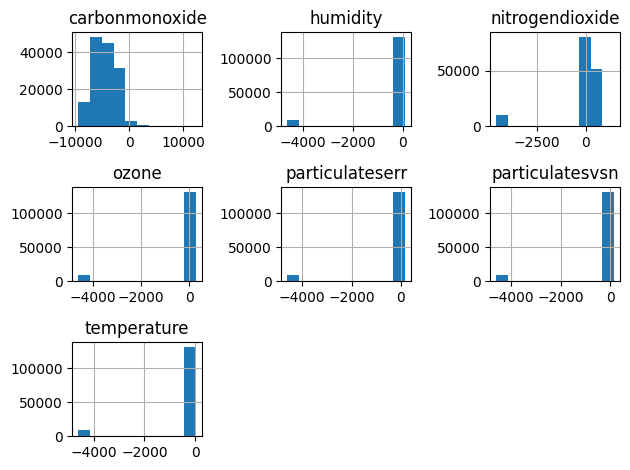

-------------- View AFTER SCALING-----------------


<Figure size 1000x1000 with 0 Axes>

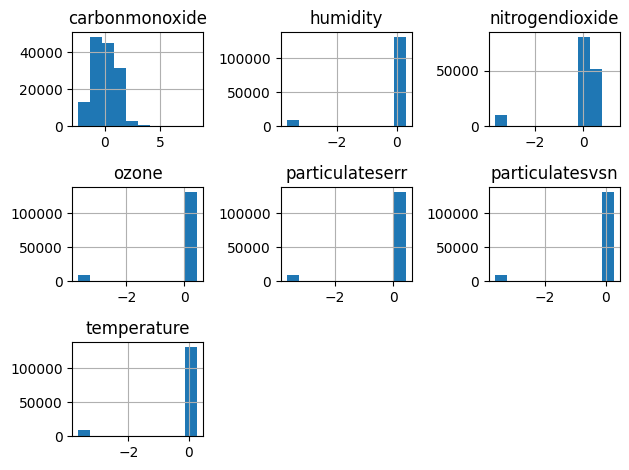

In [14]:
#Lets see the scaling before and after
data_visuals =['carbonmonoxide','humidity','nitrogendioxide','ozone','particulateserr','particulatesvsn','temperature']

print("-------------- View BEFORE SCALING-----------------")
plt.figure(figsize=(10, 10))
AirQuality_df_copy[data_visuals].hist()
plt.tight_layout()
plt.show()


print("-------------- View AFTER SCALING-----------------")
plt.figure(figsize=(10, 10))
AirQuality_df_copy_Normalized[data_visuals].hist()
plt.tight_layout()
plt.show()

### Now we check the Development Activity Monitor DataSet

In [15]:
ActivityMonitor_df.head()

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,property_id_4,property_id_5,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments,student_beds,student_accommodation_units,institutional_accom_beds,hotel_rooms,serviced_apartments,hotels_serviced_apartments,hostel_beds,childcare_places,office_flr,retail_flr,industrial_flr,storage_flr,education_flr,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000288,COMPLETED,2011.0,Melbourne (CBD),104,150-154 A'Beckett Street MELBOURNE VIC 3000,100163,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,583,0,0,0,0,0,0,0,144.958971,-37.809597,"-37.80959665, 144.9589709"
1,Pre May 16,X000449,COMPLETED,2009.0,North Melbourne,315,North Melbourne Recreation Reserve 204-206 Ard...,100514,NaN,NaN,NaN,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1768,101,0,0,0,0,2494,0,0,0,0,0,144.941433,-37.798926,"-37.79892607, 144.9414326"
2,Pre May 16,X000395,COMPLETED,2005.0,Carlton,257,24-30 Barkly Place CARLTON VIC 3053,100732,NaN,NaN,NaN,NaN,6,0,0,0,0,0,83,0,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.961448,-37.803003,"-37.803003, 144.9614476"
3,Pre May 16,X000279,COMPLETED,2014.0,West Melbourne (Residential),101,49-53 Batman Street WEST MELBOURNE VIC 3003,100850,NaN,NaN,NaN,NaN,16,140,0,114,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,144.951554,-37.811134,"-37.81113438, 144.9515544"
4,Pre May 16,X000231,COMPLETED,2003.0,Melbourne (CBD),87,11-21 Bennetts Lane MELBOURNE VIC 3000,101021,NaN,NaN,NaN,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,580,320,0,0,0,0,0,0,0,0,0,0,144.967682,-37.809166,"-37.80916563, 144.9676825"


In [16]:
column_names = list(ActivityMonitor_df.columns.values)
column_names

['data_format',
 'development_key',
 'status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'property_id_2',
 'property_id_3',
 'property_id_4',
 'property_id_5',
 'floors_above',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'town_planning_application',
 'longitude',
 'latitude',
 'geopoint']

In [17]:
# Removing Uneccerrary columns which wont be any use for data analysis
#From the Air Quality we will be using carbonMonoxide as the Target Feature 

# my main focus by using this data is to see if a building built in the radius od the air pollution sensor location effected the air pollution and see the '
#relatioonship , hence we can drop all the features expect the geolocation, date (year) , and status 

#for we can also see which types of buildings contribute to air pollution more later in , for now lets drop them and copy to new DF
Droping_Features_ActivityMonitor = ['development_key','clue_small_area','clue_block','street_address','property_id',
 'property_id_2','property_id_3','property_id_4','property_id_5','floors_above','resi_dwellings','studio_dwe','one_bdrm_dwe','two_bdrm_dwe','three_bdrm_dwe','student_apartments',
 'student_beds','student_accommodation_units','institutional_accom_beds','hotel_rooms','serviced_apartments','hotels_serviced_apartments','hostel_beds','childcare_places','office_flr',
 'retail_flr','industrial_flr','storage_flr','education_flr','hospital_flr','recreation_flr','publicdispaly_flr','community_flr','car_spaces',
 'bike_spaces','town_planning_application','geopoint']

ActivityMonitor_df_Dropped = ActivityMonitor_df.copy()

ActivityMonitor_df_Dropped = ActivityMonitor_df_Dropped.drop(columns=Droping_Features_ActivityMonitor)

In [18]:
ActivityMonitor_df_Dropped.head()

,data_format,status,year_completed,longitude,latitude
0,Pre May 16,COMPLETED,2011.0,144.958971,-37.809597
1,Pre May 16,COMPLETED,2009.0,144.941433,-37.798926
2,Pre May 16,COMPLETED,2005.0,144.961448,-37.803003
3,Pre May 16,COMPLETED,2014.0,144.951554,-37.811134
4,Pre May 16,COMPLETED,2003.0,144.967682,-37.809166


In [19]:
ActivityMonitor_df_Dropped.shape
#1430 rows of data 

(1433, 5)

In [20]:
#calling finding missing val function 
FindMissingVal(ActivityMonitor_df_Dropped)

[{'Feature': 'data_format', 'Number of Missing Values': 0},
 {'Feature': 'status', 'Number of Missing Values': 0},
 {'Feature': 'year_completed', 'Number of Missing Values': 395},
 {'Feature': 'longitude', 'Number of Missing Values': 0},
 {'Feature': 'latitude', 'Number of Missing Values': 0}]

In [21]:
#checking propotion 
missing_values = ActivityMonitor_df_Dropped.isnull().sum()
missing_proportion = (missing_values / len(ActivityMonitor_df_Dropped))*100
print("--------------------------Current Missing Values Propotion --------------------------")
print(missing_proportion)

print("missing propotion is not that bad at 27% , we can try replacing the missing values with its mode ")

#replacing with mode :

ActivityMonitor_df_FillNA = ActivityMonitor_df_Dropped.copy()
for item in FindMissingVal(ActivityMonitor_df_Dropped):
    if item['Number of Missing Values'] != 0 : # get the number of missing values > 0 we will use mean
        name = item['Feature'] # each column
        print(name + " : Has been replaced with its mode")
        ActivityMonitor_df_FillNA.fillna(value=ActivityMonitor_df_Dropped[name].mode()[0], inplace=True)  # mode fill 

--------------------------Current Missing Values Propotion --------------------------
data_format        0.00000
status             0.00000
year_completed    27.56455
longitude          0.00000
latitude           0.00000
dtype: float64
missing propotion is not that bad at 27% , we can try replacing the missing values with its mode 
year_completed : Has been replaced with its mode


In [22]:
ActivityMonitor_df_FillNA.head()

,data_format,status,year_completed,longitude,latitude
0,Pre May 16,COMPLETED,2011.0,144.958971,-37.809597
1,Pre May 16,COMPLETED,2009.0,144.941433,-37.798926
2,Pre May 16,COMPLETED,2005.0,144.961448,-37.803003
3,Pre May 16,COMPLETED,2014.0,144.951554,-37.811134
4,Pre May 16,COMPLETED,2003.0,144.967682,-37.809166


In [23]:
FindMissingVal(ActivityMonitor_df_FillNA)

[{'Feature': 'data_format', 'Number of Missing Values': 0},
 {'Feature': 'status', 'Number of Missing Values': 0},
 {'Feature': 'year_completed', 'Number of Missing Values': 0},
 {'Feature': 'longitude', 'Number of Missing Values': 0},
 {'Feature': 'latitude', 'Number of Missing Values': 0}]

In [24]:
ActivityMonitor_df_FillNA.isnull().sum()

data_format       0
status            0
year_completed    0
longitude         0
latitude          0
dtype: int64

In [25]:
#DOES NOT NEED TO BE STANDARDIZED 
""" Probably will be needing catageroical encoding """

' Probably will be needing catageroical encoding '

#### Linear Regression / Visualization
##### To start off I will be using a Baisc model of linear regression to predict future air quality in Argyle Square , later on we will look into other models more on the unsupervised side such as neural networks , classification ( which building development causes most pollution ) 

##### Visual of the AirQuality 

In [26]:

Air_df = AirQuality_df_copy_Normalized.copy()
Activity_df = ActivityMonitor_df_FillNA.copy()


In [27]:
import folium
from folium.plugins import MarkerCluster

average_latitude = Air_df['latitude_air'].mean()
average_longitude = Air_df['longitude_air'].mean()

# Initialize the map
map = folium.Map(location=[average_latitude, average_longitude], zoom_start=13)

# Iterate through the dataset
for idx, row in Air_df.iterrows():
    # Add a marker
    folium.CircleMarker(
        location=[average_latitude,average_longitude],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Time: {row['time']}\nCarbon Monoxide Level: {'carbonmonoxide'}"
    ).add_to(map)

# Save ( Uncomment to save )
#map.save('air_quality_map.html')


We can see the correlation of each feature below , i will add a heat map

In [28]:
#Finding colreation of data 
features = Air_df.drop(columns=['time', 'latitude_air', 'longitude_air'])
correlation_matrix = features.corr()
correlation_matrix

,carbonmonoxide,humidity,nitrogendioxide,ozone,particulateserr,particulatesvsn,temperature
carbonmonoxide,1.000000,-0.004973,-0.076114,-0.057132,0.000001,0.000591,0.002764
humidity,-0.004973,1.000000,0.996753,0.998252,0.999927,0.999708,0.999880
nitrogendioxide,-0.076114,0.996753,1.000000,0.999142,0.996415,0.996174,0.996214
ozone,-0.057132,0.998252,0.999142,1.000000,0.998143,0.997910,0.998033
particulateserr,0.000001,0.999927,0.996415,0.998143,1.000000,0.999789,0.999989
particulatesvsn,0.000591,0.999708,0.996174,0.997910,0.999789,1.000000,0.999784
temperature,0.002764,0.999880,0.996214,0.998033,0.999989,0.999784,1.000000


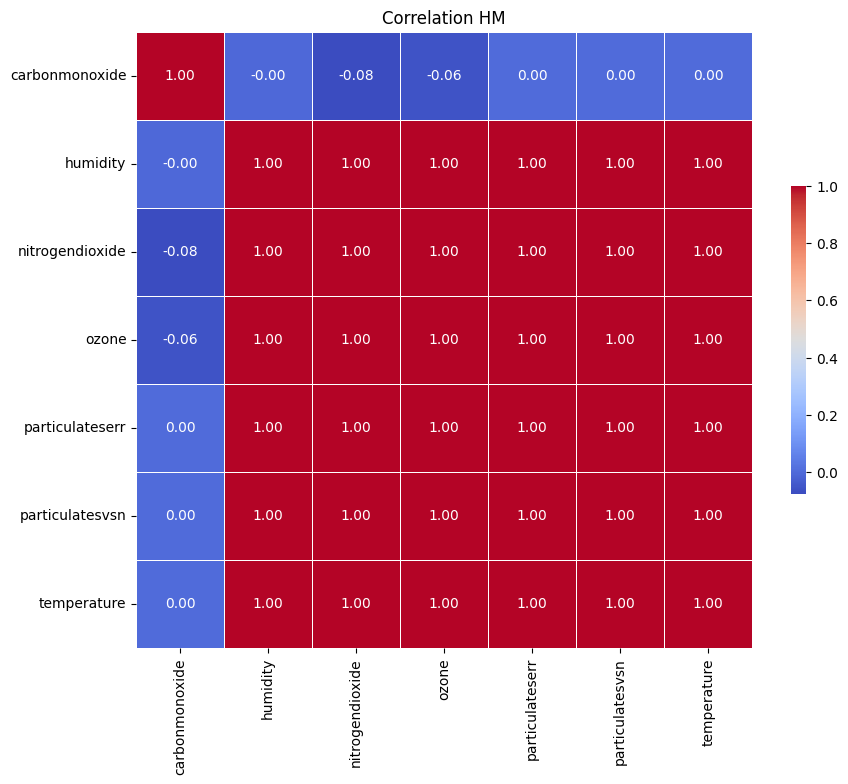

In [29]:

plt.figure(figsize=(10, 8))

#aHeat Map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .5}, linewidths=.5)

plt.title('Correlation HM')
plt.show()


### When values are closer to 1 it indicates a positive correlation 
#### Carbon monoxide and temperature - Increase in carbon monoxide = increase in temperature
#### ozone and nitrogen dioxide 
#### Nitrogen dioxide  and humidity 
#### Ozone and humidity 
### When values are closer to 1 it indicates a Negative correlation 
#### Carbon monoxide and ozone 
#### Carbon monoxide and nitrogen dioxide 
#### Temperature  and humidity 
#### Carbon monoxide and humidity 

In [30]:
# Convert to dt

Air_df['time'] = pd.to_datetime(Air_df['time'])
Air_df.set_index('time', inplace=True) #time is index

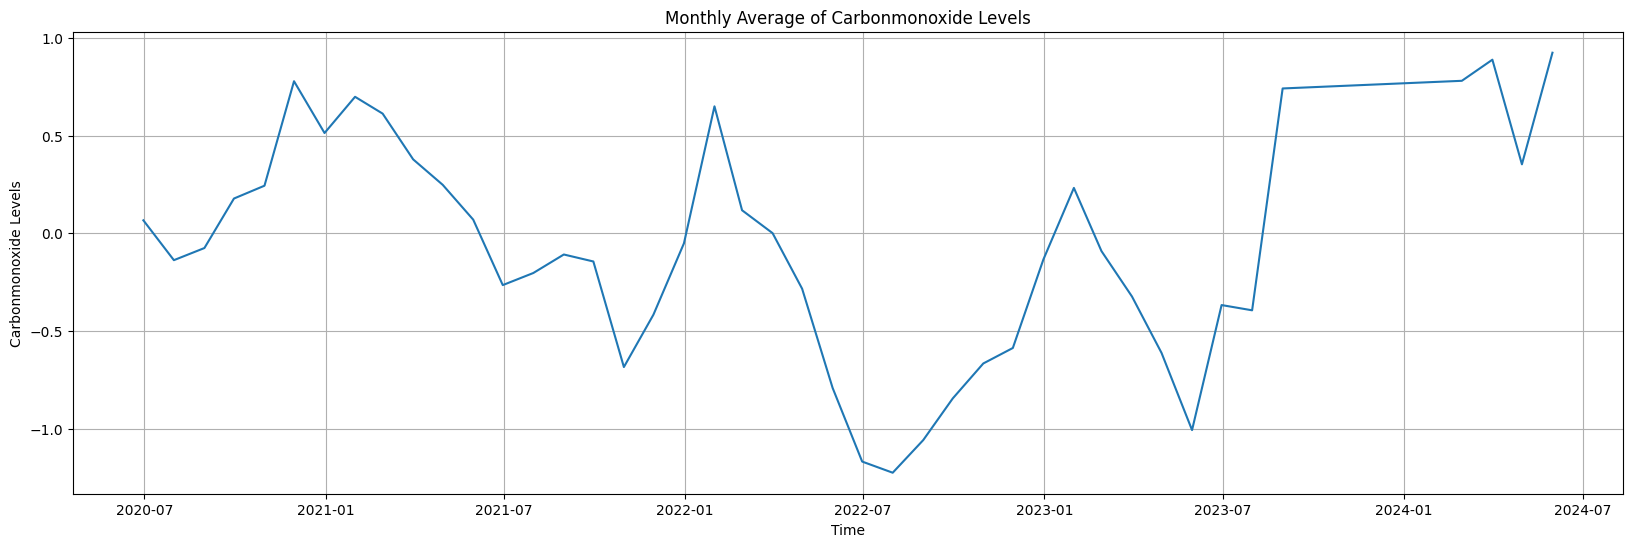

In [31]:


weekly_data = Air_df.resample('ME').mean() # get mean of data each month to plaot the data  

#Carbonmonoxide as Indicator 
indicator = 'carbonmonoxide'
# Plotting
plt.figure(figsize=(20, 6))
sns.lineplot(data=weekly_data[indicator])
plt.title(f'Monthly Average of {indicator.capitalize()} Levels')
plt.xlabel('Time')
plt.ylabel(f'{indicator.capitalize()} Levels')
plt.grid(True)
plt.show()


#### We can see that the corbonmonodixe level has a patern going up and down 

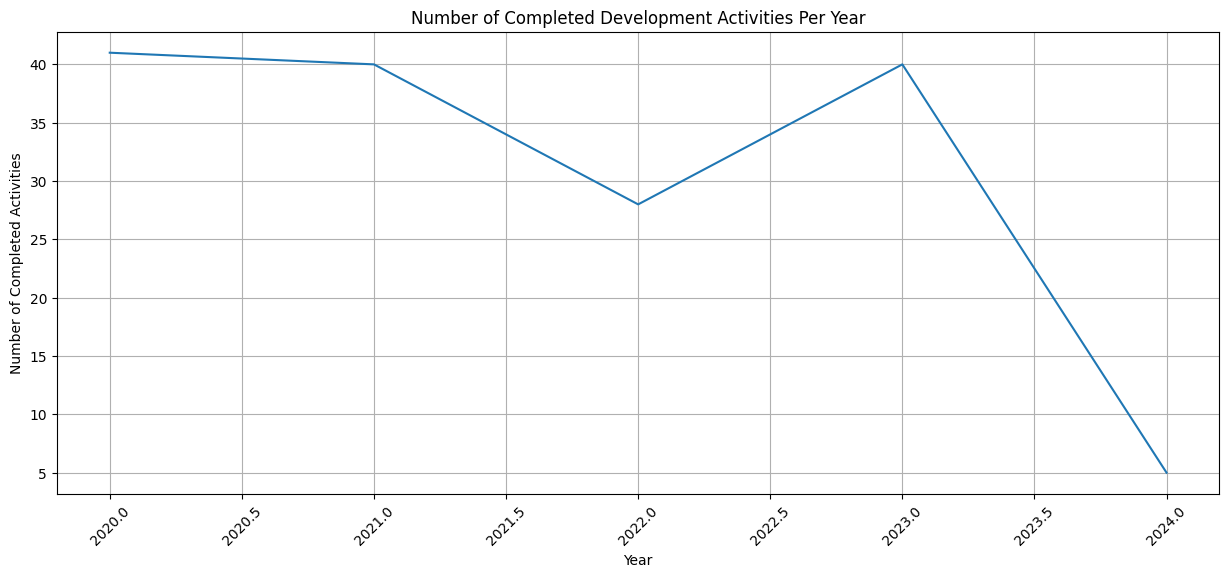

In [32]:
#Only passing compleated activities for now 
completed_activities = Activity_df[Activity_df['status'] == 'COMPLETED']
activities_count = completed_activities['year_completed'].value_counts().sort_index()
filtered_activities_count = activities_count.loc[(activities_count.index >= 2020) & (activities_count.index <= 2024)]
# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(x=filtered_activities_count.index, y=filtered_activities_count.values)
plt.title('Number of Completed Development Activities Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Completed Activities')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### The above graph shows the activity going up or down in melbourn , 2024 shows very little as the year just started ( 2024 - Aplil - 21st)

In [33]:

X = Air_df[['temperature', 'nitrogendioxide', 'ozone']] #features we ill be using to predict the carbon monoxide 
y = Air_df['carbonmonoxide']#our target feature
"""
target_scaler = StandardScaler()
y = target_scaler.fit_transform(y.values.reshape(-1, 1))
#TEST
"""
#Splitting data train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #30% test size

#Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

###########################################PREDICTING###############################################
y_pred = model.predict(X_test)

###########################################EVALUATION###############################################
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.07540514586553825
R-squared: 0.9246757525876584


#### Mean Squared Error (MSE) : 0.03731038122228091 is a good indication that the average of the squares of the errors between the predicted and actual carbon monoxide levels are low hence a better fit for the data
#### R-squared:  shows how well the variability in carbon monoxide levels is. value close to 1 shows a model that closely fits the data.  0.961 :  model does an very good job of showing the variance in carbon monoxide levels based on the features i trained it with.

### In conclusion for this model of linear regression we can see good results where there is very little MSE and good R-squared. hence the LR model will accurately be able to predict future carbon monoxide levels.

In [34]:
#Combine Dataset InnerJoin
#Air_df 
#Activity_df 


Air_df['year'] = Air_df.index.year
#'APPLIED' or 'APPROVED' filter
filtered_activity_monitor_df = Activity_df[~Activity_df['status'].isin(['APPLIED', 'APPROVED'])]
activity_counts_by_year = filtered_activity_monitor_df.groupby('year_completed').size().reset_index(name='activity_count')
combined_df = pd.merge(Air_df.reset_index(), activity_counts_by_year, left_on='year', right_on='year_completed', how='left')
combined_df['activity_count'] = combined_df['activity_count'].fillna(0)


combined_df.head(), combined_df.shape # check 


(                       time  carbonmonoxide  humidity  nitrogendioxide  \
 0 2022-05-03 21:46:34+00:00       -0.811076  0.277066         0.322698   
 1 2021-05-15 06:04:33+00:00       -0.811076  0.255234         0.314563   
 2 2021-05-15 06:10:49+00:00        0.850396  0.263631         0.204732   
 3 2021-05-15 07:49:32+00:00       -1.087331  0.261951         0.353614   
 4 2021-05-15 09:19:32+00:00       -1.087331  0.265310         0.353614   
 
       ozone  particulateserr  particulatesvsn  temperature  latitude_air  \
 0  0.322072         0.273061          0.27674     0.271601    -37.802772   
 1  0.307002         0.273061          0.27674     0.271431    -37.802772   
 2  0.196493         0.273061          0.27674     0.269986    -37.802772   
 3  0.330444         0.273061          0.27674     0.269561    -37.802772   
 4  0.326258         0.273061          0.27674     0.269051    -37.802772   
 
    longitude_air  year  year_completed  activity_count  
 0     144.965551  2022   

In [35]:
#Checking for empty data 
missing_values = combined_df.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)


#Lets see propotion
missing_proportion = (missing_values / len(combined_df))*100
print("--------------------------Current Missing Values Propotion --------------------------")
print(missing_proportion)

combined_df = combined_df[combined_df['temperature'] != 0.0]


--------------------------Current Missing Values --------------------------
time               0
carbonmonoxide     0
humidity           0
nitrogendioxide    0
ozone              0
particulateserr    0
particulatesvsn    0
temperature        0
latitude_air       0
longitude_air      0
year               0
year_completed     0
activity_count     0
dtype: int64
--------------------------Current Missing Values Propotion --------------------------
time               0.0
carbonmonoxide     0.0
humidity           0.0
nitrogendioxide    0.0
ozone              0.0
particulateserr    0.0
particulatesvsn    0.0
temperature        0.0
latitude_air       0.0
longitude_air      0.0
year               0.0
year_completed     0.0
activity_count     0.0
dtype: float64


#### Visualize the activity dataset

There are alot of points in the dataset hence im only limiting to visualize the ones in 1km radius 

In [36]:
from geopy.distance import distance #using geopy to ge the distance 

center_coord = (-37.802772, 144.965551) # avergae coord of the airquality
radius = 1000
def calculate_distance_geopy(lat1, lon1, lat2, lon2):
    return distance((lat1, lon1), (lat2, lon2)).meters
#ADD to new ds , with filtered data of 1km for visuals 
filtered_data = Activity_df.loc[Activity_df.apply(lambda row: calculate_distance_geopy(center_coord[0], center_coord[1], row['latitude'], row['longitude']) < radius, axis=1)] 



In [37]:
filtered_map = folium.Map(location=center_coord, zoom_start=15)
#Radius Circle of 1 km 
folium.Circle(
    center_coord,
    radius=radius,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.2,
    popup='1000-meter Radius'
).add_to(filtered_map)

folium.CircleMarker( # show the sensor 
    location=center_coord,
    radius=7,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.6,
).add_to(filtered_map)

#add markers with relevant information
for index, activity in filtered_data.iterrows(): #
    folium.Marker(
        location=[activity['latitude'], activity['longitude']],
        popup=f"Year: {activity['year_completed']}, Status: {activity['status']}", #points of development 
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(filtered_map)

filtered_map



# Combined Dataset Visualization

In [38]:

combined_dataset = combined_df.copy()

In [39]:
combined_dataset['time'] = pd.to_datetime(combined_dataset['time'])
combined_dataset.set_index('time', inplace=True) #time is index

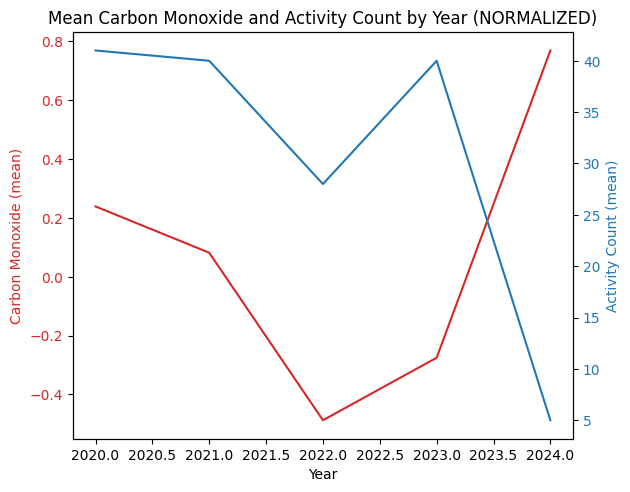

In [40]:

annual_means = combined_dataset.groupby('year')[['carbonmonoxide', 'activity_count']].mean().reset_index()# group data into each year , get mean for both carbon monoxide and activity .
# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year') #label
ax1.set_ylabel('Carbon Monoxide (mean)', color=color)
ax1.plot(annual_means['year'], annual_means['carbonmonoxide'], color=color, label='Carbon Monoxide')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()#sharing same axis
color = 'tab:blue'
ax2.set_ylabel('Activity Count (mean)', color=color)  # we already handled the x-label with ax1
ax2.plot(annual_means['year'], annual_means['activity_count'], color=color, label='Activity Count')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mean Carbon Monoxide and Activity Count by Year (NORMALIZED)')
plt.show()


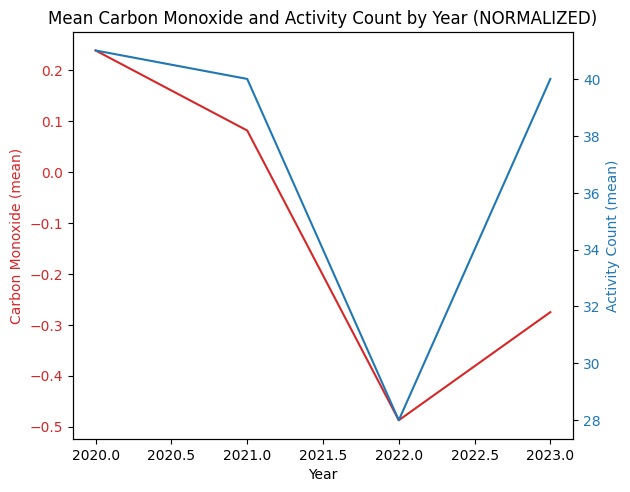

In [41]:

def Plot_Both():
    filtered_dataset = combined_dataset[combined_dataset['year'] <= 2023]
    
    # Group data by year and calculate the mean for carbon monoxide and activity count
    annual_means = filtered_dataset.groupby('year')[['carbonmonoxide', 'activity_count']].mean().reset_index()
    
    # Plotting
    fig, ax1 = plt.subplots()
    
    color = 'tab:red'
    ax1.set_xlabel('Year')  # label
    ax1.set_ylabel('Carbon Monoxide (mean)', color=color)
    ax1.plot(annual_means['year'], annual_means['carbonmonoxide'], color=color, label='Carbon Monoxide')
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # sharing the same axis
    color = 'tab:blue'
    ax2.set_ylabel('Activity Count (mean)', color=color)  # we already handled the x-label with ax1
    ax2.plot(annual_means['year'], annual_means['activity_count'], color=color, label='Activity Count')
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Mean Carbon Monoxide and Activity Count by Year (NORMALIZED)')
    plt.show()

Plot_Both()


##### We can clearly see a pattern in the visuals , the rise and fall of carbon monoxide levels follow the number of building built wihtin the same year . We can also IGNORE the anomoly in 2024 as the year just started and the number of activities (COMPLEATED) is not set.

### Linear regression with activity count 

##### Model is well fit and works well 

In [87]:
X = combined_dataset[['humidity', 'nitrogendioxide', 'ozone','particulateserr','particulatesvsn','temperature','activity_count']] #features we ill be using to predict the carbon monoxide 
y = combined_dataset['carbonmonoxide']#our target feature

#Splitting data train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Linear Regression model on the training set
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.03843000270109803
R-squared: 0.9616112269489369


C:\Users\tharu\AppData\Local\Temp\ipykernel_14996\2738554909.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_limited = y_test[sample_indices]


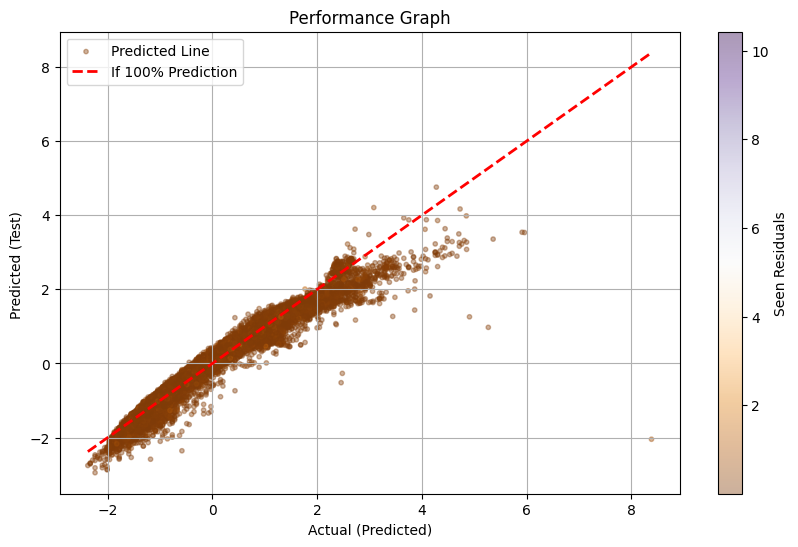

In [84]:

percentage = 1 # between 0 - 1

sample_size = int(percentage * len(y_test)) #100 % sample size
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)  


#Uses the sample size to get number of samples to plot 
y_test_limited = y_test[sample_indices]
y_pred_limited = y_pred[sample_indices]

#calculate residuals
residual = y_test_sample - y_pred_sample

# PLOTSS
plt.figure(figsize=(10, 6))
plt.scatter(y_test_limited, y_pred_limited, c=np.abs(residual), cmap='PuOr', alpha=0.4, s=10, label='Predicted Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='If 100% Prediction')
plt.colorbar(label='Seen Residuals')
plt.xlabel('Actual (Predicted)')
plt.ylabel('Predicted (Test) ')
plt.title('Performance Graph')
plt.legend()
plt.grid(True)
plt.show()


### The graph above shows us the training performance of the linear regression model , we can see that the predicted values fit closely with the perfect 100 assumed line , and that the residuals ( diffrence between Actual  and predicted) is very low , close to 0 and some negative with some outliers which is very good as seen below .

In [75]:
residuals 

time
2020-07-15 07:16:23+00:00    0.013649
2021-02-07 04:20:21+00:00   -0.121264
2022-07-27 19:54:04+00:00    0.067521
2021-03-28 23:18:40+00:00   -0.121386
2021-04-12 02:31:19+00:00   -0.126735
                               ...   
2021-10-10 04:57:44+00:00   -0.022045
2023-02-13 16:11:31+00:00   -0.132859
2021-05-23 02:33:17+00:00   -0.137106
2021-06-11 04:45:11+00:00   -0.094514
2021-08-29 01:04:41+00:00   -0.303099
Name: carbonmonoxide, Length: 42483, dtype: float64

### The above residual indicates that the actual value is lower than the predicted value , this could indicate the model under predicts.

### Below graph shows the residual over the dates which solidifies the previouse statement s, the model is getting the predictions very close to acutal.

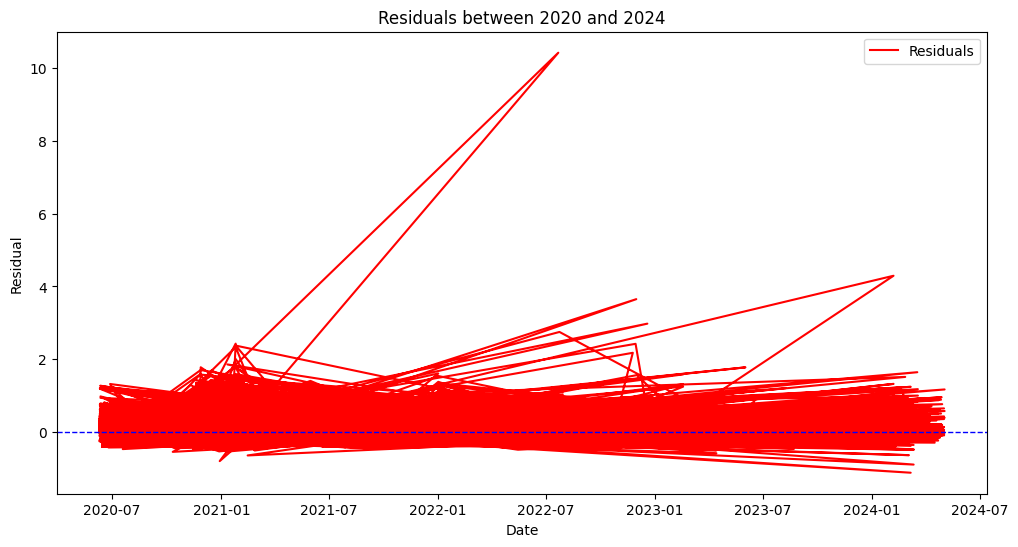

In [78]:

residuals.index = pd.to_datetime(residuals.index)#t0 DF
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals.values, label='Residuals', color='red')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=1)  #Line to show perfect predictions
plt.title('Residuals between 2020 and 2024')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()


In [43]:

def reverse_normalization(normalized_df, columns, scaler): # Takes in fitted SCALER 
    df_reversed = normalized_df.copy()
    df_reversed[columns] = scaler.inverse_transform(normalized_df[columns])
    
    return df_reversed


#Testing 
reversed_df = reverse_normalization(AirQuality_df_copy_Normalized, data_float_columns, scaler)
print(reversed_df.head())



                       time  carbonmonoxide  humidity  nitrogendioxide  ozone  \
0 2022-05-03 21:46:34+00:00       -0.811076      77.0            268.0  137.0   
1 2021-05-15 06:04:33+00:00       -0.811076      51.0            258.0  119.0   
2 2021-05-15 06:10:49+00:00        0.850396      61.0            123.0  -13.0   
3 2021-05-15 07:49:32+00:00       -1.087331      59.0            306.0  147.0   
4 2021-05-15 09:19:32+00:00       -1.087331      63.0            306.0  142.0   

   particulateserr  particulatesvsn  temperature  latitude_air  longitude_air  
0              0.0            151.0         15.1    -37.802772     144.965551  
1              0.0            151.0         14.9    -37.802772     144.965551  
2              0.0            151.0         13.2    -37.802772     144.965551  
3              0.0            151.0         12.7    -37.802772     144.965551  
4              0.0            151.0         12.1    -37.802772     144.965551  


In [44]:
def reverse_normalization(normalized_df, feature_columns, target_column, feature_scaler, target_scaler): # take in new para of target scaler 

    df_reversed = normalized_df.copy()
    
    #Inverse the features
    df_reversed[feature_columns] = feature_scaler.inverse_transform(normalized_df[feature_columns])
    
    #Inverse the target
    if target_column:
        df_reversed[target_column] = target_scaler.inverse_transform(normalized_df[target_column].values.reshape(-1, 1)) # inverse just target column
    
    return df_reversed
# Testing the function with both feature and target scalers
reversed_df = reverse_normalization(AirQuality_df_copy_Normalized, data_float_columns, data_target, scaler, target_scaler)
print(reversed_df.head())


                       time  carbonmonoxide  humidity  nitrogendioxide  ozone  \
0 2022-05-03 21:46:34+00:00         -6261.0      77.0            268.0  137.0   
1 2021-05-15 06:04:33+00:00         -6261.0      51.0            258.0  119.0   
2 2021-05-15 06:10:49+00:00         -2887.0      61.0            123.0  -13.0   
3 2021-05-15 07:49:32+00:00         -6822.0      59.0            306.0  147.0   
4 2021-05-15 09:19:32+00:00         -6822.0      63.0            306.0  142.0   

   particulateserr  particulatesvsn  temperature  latitude_air  longitude_air  
0              0.0            151.0         15.1    -37.802772     144.965551  
1              0.0            151.0         14.9    -37.802772     144.965551  
2              0.0            151.0         13.2    -37.802772     144.965551  
3              0.0            151.0         12.7    -37.802772     144.965551  
4              0.0            151.0         12.1    -37.802772     144.965551  


#### Testing LR model

In [45]:
def collect_and_scale_inputs(scaler):
    #Inputs
    humidity = float(input("Enter humidity: "))
    temperature = float(input("Enter temperature: "))
    nitrogendioxide = float(input("Enter nitrogendioxide: "))
    ozone = float(input("Enter ozone: "))
    activity_count = float(input("Enter activity count: "))
    particulateserr = 0
    particulatesvsn = 144

    # Ones to normalize expect activity
    input_data_for_scaling = pd.DataFrame([{
        'humidity': humidity,
        'nitrogendioxide': nitrogendioxide,
        'ozone': ozone,
        'particulateserr': particulateserr,
        'particulatesvsn': particulatesvsn,
        'temperature' : temperature
    }])
    # Scale the selected features using the scale parameter
    scaled_features = scaler.transform(input_data_for_scaling)

    # Create a new DataFrame from scaled features with appropriate column names
    scaled_features_df = pd.DataFrame(scaled_features, columns=input_data_for_scaling.columns)

    # Add 'activity_count' to the scaled_features_df
    scaled_features_df['activity_count'] = activity_count

    return scaled_features_df

#combined_input_data = collect_and_scale_inputs(scaler)
#print(combined_input_data)




In [46]:
#predicted_co_levels = model2.predict(combined_input_data)#PREDICTING
#inverse scaling
#Inverse_Scaled = target_scaler.inverse_transform(predicted_co_levels.reshape(-1, 1)) # inverse the ouput for redable format
#print(Inverse_Scaled)

### Neural Model Creation

I implimented a Neural model with relu activation function for the hidden layers and linear activation function for the output layer as the data is continiouse 

In [47]:
#MODEL CREATION 
X = combined_dataset[['humidity','temperature', 'nitrogendioxide', 'ozone', 'activity_count','particulateserr','particulatesvsn']]
y = combined_dataset['carbonmonoxide'] # target 

#Splitting train and test , probabs add validation after testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#NEURAL MODEL
model = Sequential([
    Input(shape=(X_train.shape[1],)), # input layer
    Dense(11, activation='relu'),  # First hidden layer
    Dense(5, activation='relu'),  # Second hidden layer ( relu )
    Dense(1, activation='linear')  # Output layer (linear , change to relu after testing)
])

#Compiling
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])

#model visual
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154 (616.00 B)

 Trainable params: 154 (616.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
#=========================TRAINING================================
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 830us/step - loss: 19.7881 - mean_squared_error: 19.7881 - val_loss: 0.7666 - val_mean_squared_error: 0.7665
Epoch 2/30
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step - loss: 0.6875 - mean_squared_error: 0.6875 - val_loss: 0.3183 - val_mean_squared_error: 0.3183
Epoch 3/30
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step - loss: 0.2298 - mean_squared_error: 0.2298 - val_loss: 0.1284 - val_mean_squared_error: 0.1285
Epoch 4/30
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.1236 - val_mean_squared_error: 0.1237
Epoch 5/30
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.1072 - val_mean_squared_error: 0.1073
Epoch 6/30
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.1069 - val_mean_squared_error: 0.1069
Epoch 7/30
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 738us/step - loss: 0.1109 - mean_squared_

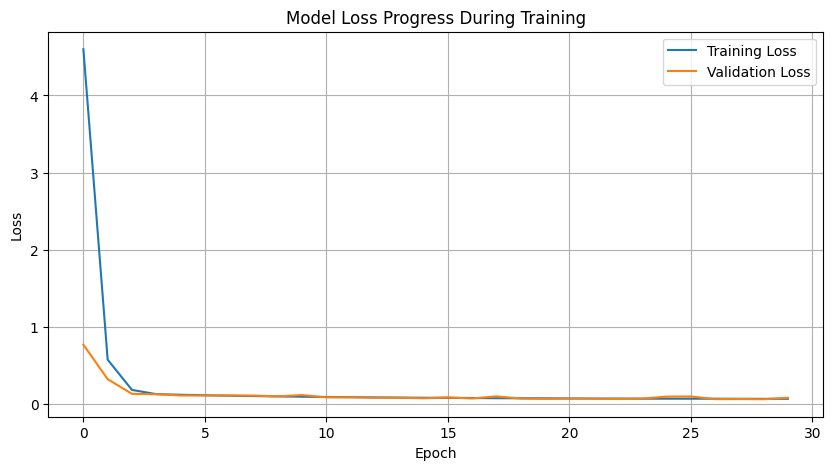

In [49]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
# Evaluate  the test data

mse, _ = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse}")

1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - loss: 0.0752 - mean_squared_error: 0.0752
Test MSE: 0.07834792882204056


#### From the Neural Model made above we can see that it did underperform compared to the linear regression model, in terms of accuracy as for MSE , the neural model did well and created a 0.02 MSE compared to the linear regression which got a 0.03 for both validation and training metrics.

# Conclusion

#### From looking at the relationships between activity count and carbon monoxide levels, my results indicate that there are correlations between the activity of development and levels of carbon monoxide levels where at high times of activity we see a trend of increasing carbon monoxide levels. I made a linear regression and a neural network model to help predict carbon monoxide levels at set activity counts and current weather details such as temperature, humidity, ozone, and nitrogen dioxide. I would say this prediction is successful with the model gaining a low MSE and a High R-squared on average. Moreover, the model can be used in such a way to predict carbon monoxide levels with 0 activity to the whole of Melbourne as wind and weather conditions cause the spread of particulates.

### In Conclusion we saw patterns which relates the activity count to the levels of carbon monoxide as seen below (I have excluded 2023-2024 as the data is not available fully):

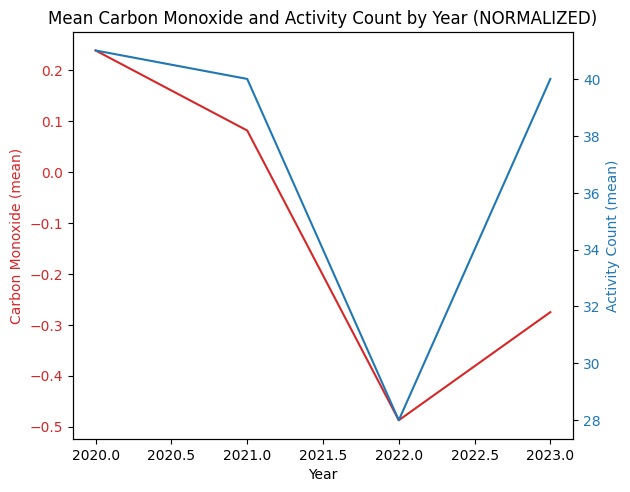

In [51]:
Plot_Both()

With this, I ran a linear regression and a deep neural model and came to a conclusion that the linear regression model is better at predicting the carbon monoxide level. The Neural Model does good but has undefitting at relating the activity count from my understanding. The code below contains the actual testing where users need to input the data and the model will give a prediction. Moreover in the sections above we had made other graphs and maps to show the correlation and other metrics.

## Prediction ( Linear Regression Model)

In [52]:
while True:
    combined_input_data = collect_and_scale_inputs(scaler)
    print("=========================THE Data you input===================")
    print(combined_input_data)
    print("==============================================================")
    predicted_co_levels = model2.predict(combined_input_data)  # PREDICTING
    # Inverse scaling
    inverse_scaled = target_scaler.inverse_transform(predicted_co_levels.reshape(-1, 1))  # inverse the output for readable format
    print("Predicted Carbonmonoxide level : ",inverse_scaled)
    print("==============================================================")
    # Exit the loop
    exit_command = input("Press 'X' to exit or any other key to predict again: ")
    if exit_command.upper() == 'X':
        break

Enter humidity:  21
Enter temperature:  34
Enter nitrogendioxide:  23
Enter ozone:  123
Enter activity count:  23


=========================THE Data you input===================
   humidity  nitrogendioxide     ozone  particulateserr  particulatesvsn  \
0  0.230043         0.123376  0.310351         0.273061         0.270955   

   temperature  activity_count  
0     0.287662            23.0  
Predicted Carbonmonoxide level :  [[-3432.15682579]]


Press 'X' to exit or any other key to predict again:  x
